C:\Users\Daniela de la Torre\AppData\Local\Temp\ipykernel_12952\2395149416.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Conjuntos de Datos', fontsize=10)


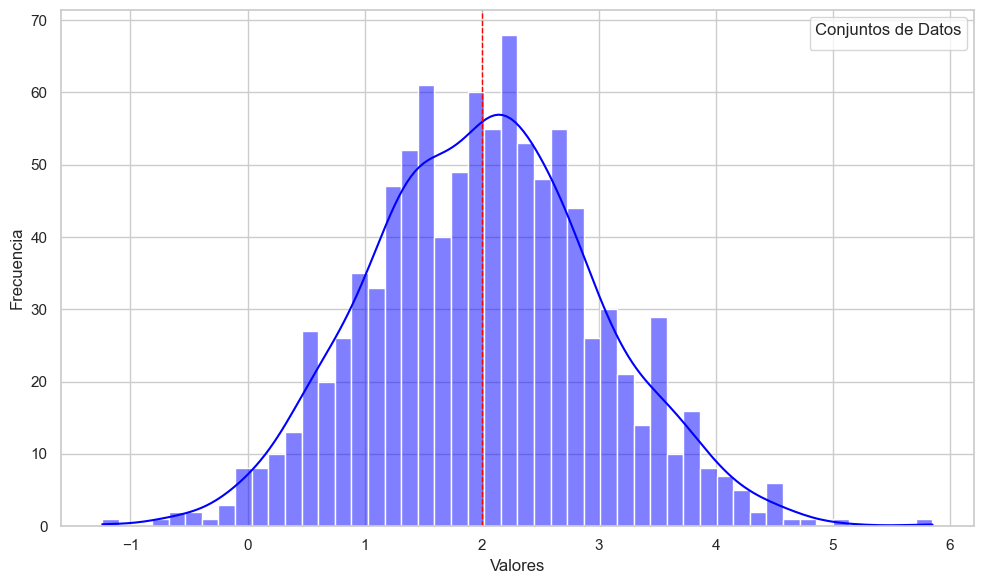

1) Verosimilitud máxima bajo H0 (mu=0): ℓ0 = -2517.8035
2) Verosimilitud máxima bajo H1 (MLE): ℓ1 = -478.9525
   - Estimador MLE de mu = 2.0193
3) Estadístico de prueba: Λ = 4077.7020
4) Distribución de referencia: χ² con 1 grado de libertad
   - Valor crítico (alpha=0.05): 3.8415
   => Rechazamos H0 (mu=0). Existe evidencia de que mu ≠ 0.


In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import chi2
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
#Prueba LRT para saber si se acepta o se rechaza una hipotesis.
#se puede pedir la distribucion pero previo al calculo 
'''
En este ejemplo, simulamos datos de una Normal 
𝑁(𝜇,𝜎^2) con 𝜎^2=1 (conocido) y testeamos:

𝐻0:𝜇=0 
vs
𝐻1:𝜇≠0.
'''

#%% 1. Generar datos simulados
np.random.seed(42)
mu_true = 2.0   # Valor "real" de mu para simular
sigma = 1.0     # Desviación estándar conocida
n = 1000          # Tamaño de muestra
X = np.random.normal(loc=mu_true, scale=sigma, size=n)

#%% Gráfico de valores
plt.figure(figsize=(10, 6))
sns.histplot(X, kde=True, color='blue',  bins=50)
plt.axvline(mu_true, color='red', linestyle='--', linewidth=1)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Conjuntos de Datos', fontsize=10)
plt.tight_layout()
plt.show()

#%% Funciones auxiliares
def log_likelihood(mu, data):
    """
    Log-verosimilitud (omitiendo constantes aditivas) 
    para Normal con varianza = 1.
    
    L(μ) ~ exp( -0.5 * sum((x_i - μ)^2 ) )
    => log L(μ) ~ -0.5 * sum((x_i - μ)^2)
    """
    return -0.5 * np.sum((data - mu)**2)

def neg_log_likelihood(mu, data):
    """
    Función de -log-verosimilitud para usar con minimize().
    """
    return 0.5 * np.sum((data - mu)**2)

#%% 2. Calcular la verosimilitud máxima bajo H0
#    (Aquí H0: mu = 0 está fijado, no hay que optimizar)
l_0 = log_likelihood(mu=0.0, data=X)

#%% 3. Calcular la verosimilitud máxima bajo H1
#    (H1: mu es libre; se obtiene por MLE)
# Usamos 'minimize' para encontrar el mu que maximiza la verosimilitud
# (equivale a minimizar -log L(mu))
res = minimize(fun=neg_log_likelihood, x0=0.0, args=(X,))
mu_mle = res.x[0]

#%% log-verosimilitud máxima bajo H1
l_1 = log_likelihood(mu=mu_mle, data=X)

#%% 4. Formar el estadístico Λ = -2(ℓ0 - ℓ1)
Lambda = -2 * (l_0 - l_1)

#%% 5. Comparar con la distribución χ²ν
#    (ν = diferencia en número de parámetros: aquí 1)
df = 1  # Grados de libertad
alpha = 0.05
crit_value = chi2.ppf(1 - alpha, df=df)

#%% Resultados
print(f"1) Verosimilitud máxima bajo H0 (mu=0): ℓ0 = {l_0:.4f}")
print(f"2) Verosimilitud máxima bajo H1 (MLE): ℓ1 = {l_1:.4f}")
print(f"   - Estimador MLE de mu = {mu_mle:.4f}")
print(f"3) Estadístico de prueba: Λ = {Lambda:.4f}")
print(f"4) Distribución de referencia: χ² con {df} grado de libertad")
print(f"   - Valor crítico (alpha={alpha}): {crit_value:.4f}")

if Lambda > crit_value:
    print("   => Rechazamos H0 (mu=0). Existe evidencia de que mu ≠ 0.")
else:
    print("   => No se rechaza H0 (mu=0).")